In [1]:
library("ggplot2")
library("ggpubr")
library("scales")
library("reshape2")
library("ggpattern")

library("pracma")
library("ggplot2")
library("gghalves")
library("ggbeeswarm")
set.seed(2023)

# Tensor Correlation

In [2]:
PBMC.fig.list  = readRDS("../Figure/Simulation-PBMC/decon.L1.max_stds.2/RNA_Simulation-PBMC_decon.L1_500_fig.list.rds")
reinius.fig.list = readRDS("../Figure/Purified-Reinius/hvf.10k/Reinius_eval_hvf.10k_fig.list.rds")

In [3]:
k = 5
covar.len = (k * k - k )/2

title.size = 30
lab.size = 30
legend.size = 32.5  

### update legend, lab, title size

In [4]:
ls(PBMC.fig.list)

[1] "add.box.g"   "covar.bar.g" "mean.bar.g"  "var.bar.g"   "Z.corrs.g"

In [5]:
PBMC.fig.list$mean.bar.g = PBMC.fig.list$mean.bar.g +  
                            theme(legend.text = element_text(size=legend.size)) + 
                            theme(text=element_text(size=lab.size)) +
                            theme(plot.title = element_text(hjust = 0.5, size = title.size))


PBMC.fig.list$var.bar.g = PBMC.fig.list$var.bar.g +  
                            theme(legend.text = element_text(size=legend.size)) + 
                            theme(text=element_text(size=lab.size)) +
                            theme(plot.title = element_text(hjust = 0.5, size = title.size))

PBMC.fig.list$covar.bar.g = PBMC.fig.list$covar.bar.g +  
                            theme(legend.text = element_text(size=legend.size)) + 
                            theme(text=element_text(size=lab.size)) +
                            theme(plot.title = element_text(hjust = 0.5, size = title.size))

for (i in 1:k){
   PBMC.fig.list$Z.corrs.g[[i]] = PBMC.fig.list$Z.corrs.g[[i]] +  
                                  theme(legend.text = element_text(size=legend.size)) + 
                                  theme(text=element_text(size=lab.size)) +
                                  theme(plot.title = element_text(hjust = 0.5, size = title.size))
}


PBMC.fig.list$add.box.g = PBMC.fig.list$add.box.g + theme(legend.text = element_text(size=legend.size)) + 
                                                    theme(text=element_text(size=lab.size)) +
                                                    theme(plot.title = element_text(hjust = 0.5, size = title.size))


for (entropy in names(reinius.fig.list$cor.bar.plots)){
    reinius.fig.list$cor.bar.plots[[entropy]] = reinius.fig.list$cor.bar.plots[[entropy]] + 
                                                theme(legend.text = element_text(size=legend.size)) + 
                                                theme(text=element_text(size=lab.size)) +
                                                theme(plot.title = element_text(hjust = 0.5, size = title.size))
}

## params

In [6]:
plts = list(3)
plts[[1]] = PBMC.fig.list$mean.bar.g + theme(legend.position="none") 
plts[[2]] = PBMC.fig.list$var.bar.g + theme(legend.position="none") + theme(axis.title.y = element_blank()) 
plts[[3]] = PBMC.fig.list$covar.bar.g + theme(axis.title.y = element_blank()) 


covar.width   = round(2 * covar.len/k)
figure.width  = (4 + covar.width) * 3
figure.height = 7 

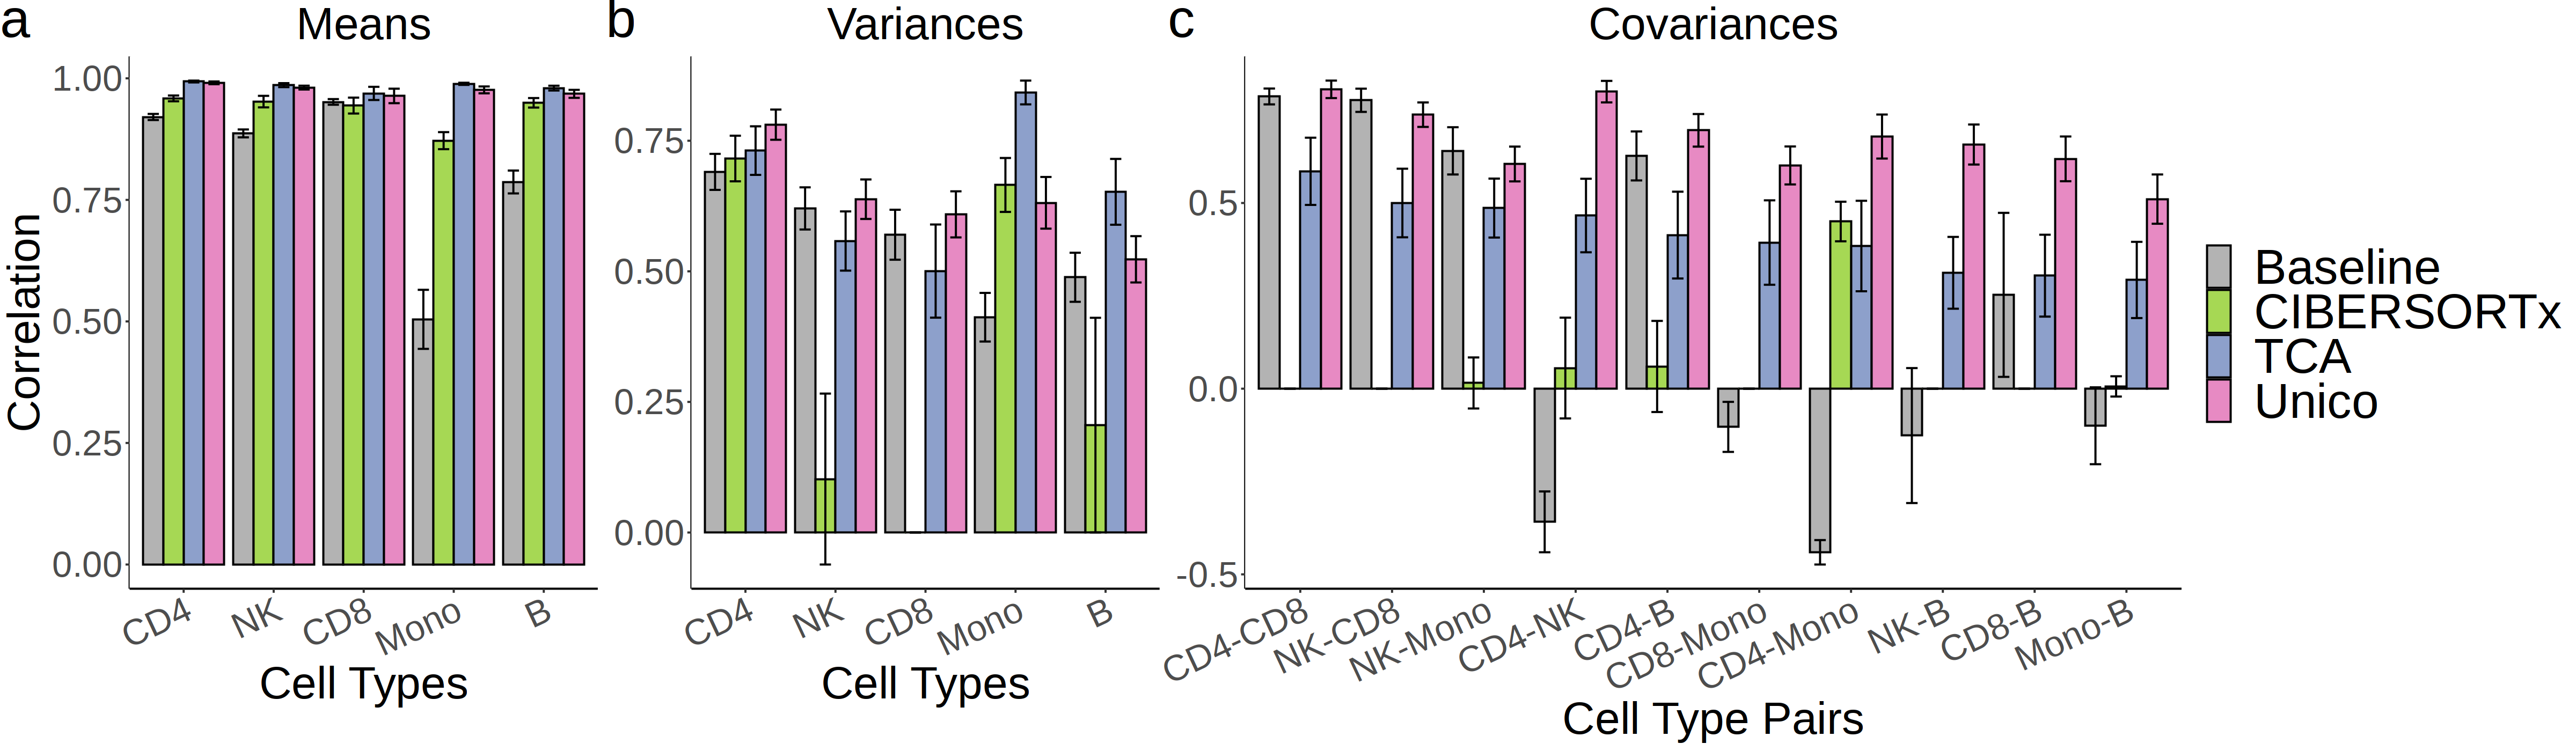

In [7]:
options(repr.plot.width = figure.width, repr.plot.height = figure.height, repr.plot.res = 200)
params.bar.g = egg::ggarrange(plots=list(plts[[1]], plts[[2]], plts[[3]]),  
                              labels = c("a", "b", "c"), 
                              label.args = list(gp = grid::gpar(font = 20, cex =3)),
                              align = "h",
                              widths = c(2,2,covar.width))

## Corrs

adding dummy grobs



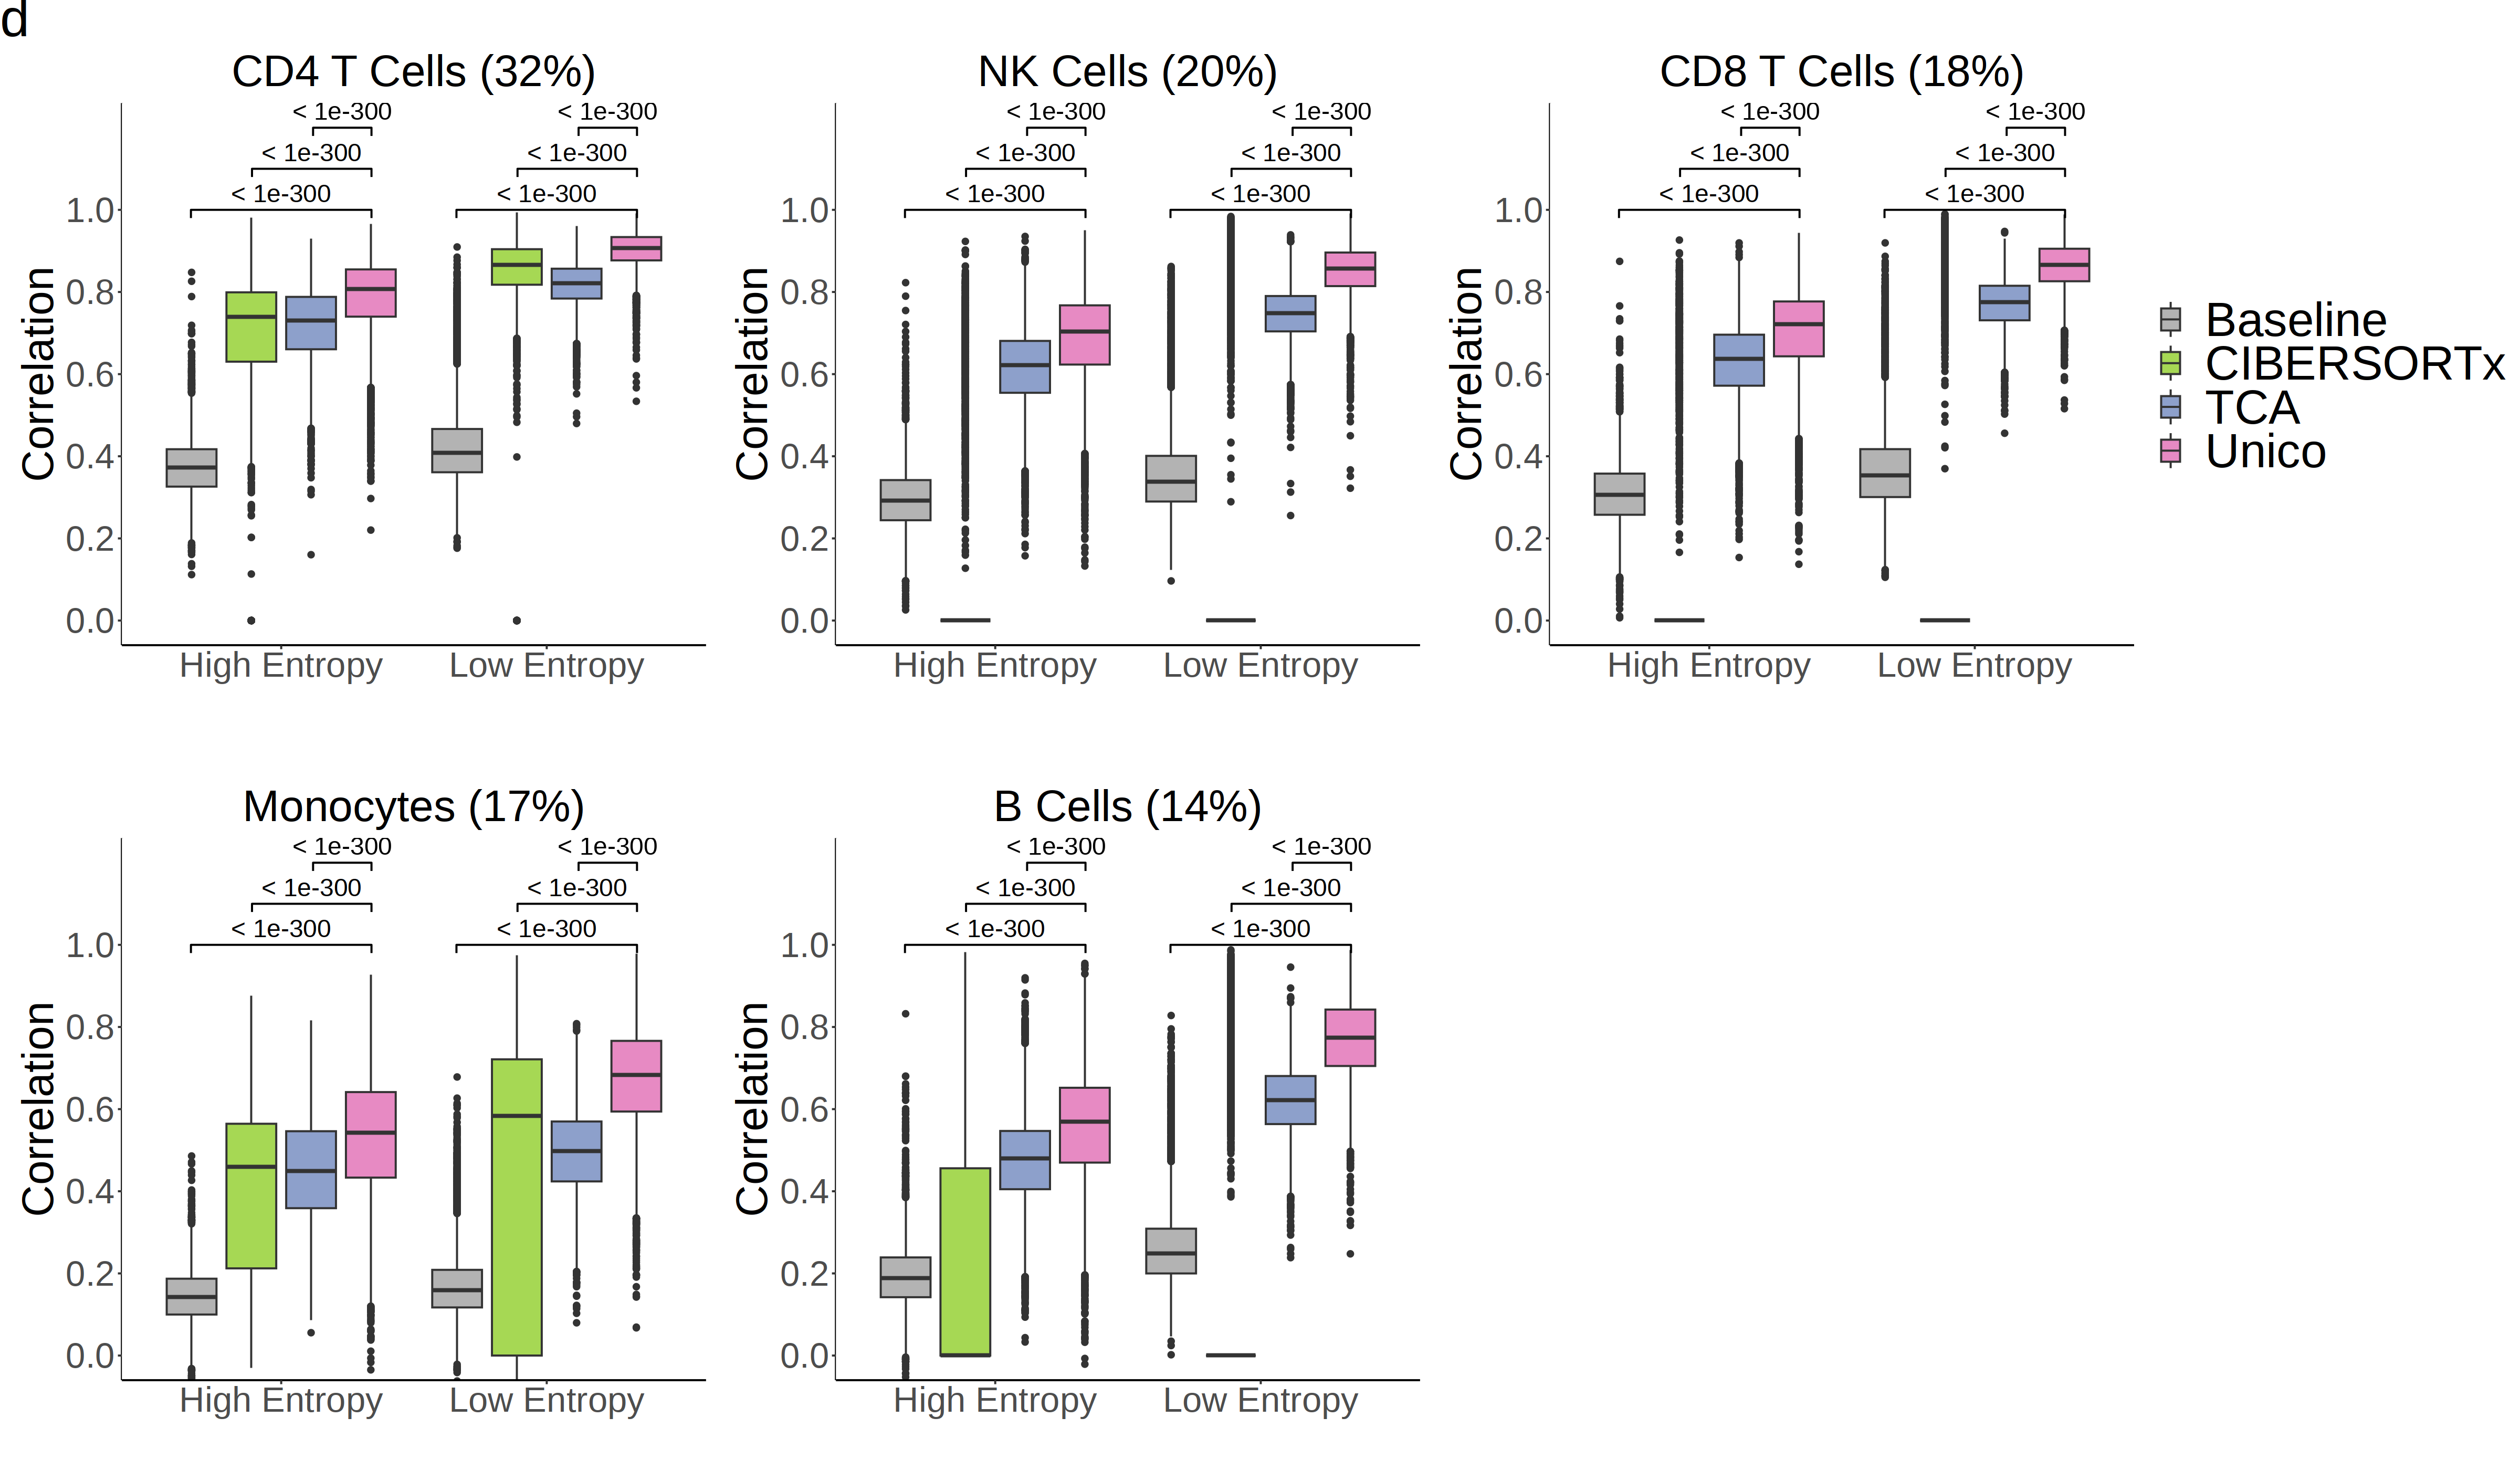

In [8]:
figure.width  = (ceil(k/2) + 1) * 6
figure.height = 2 * 6 + 2

options(repr.plot.width = figure.width, repr.plot.height = figure.height, repr.plot.res = 200)
cor.box.g = egg::ggarrange(plots = PBMC.fig.list$Z.corrs.g,
                           labels = c("d"), 
                           label.args = list(gp = grid::gpar(font = 20, cex =3)),
                           align = "h",
                           widths = rep(2, ceil(k/2)),  
                           debug=F)

## add signal

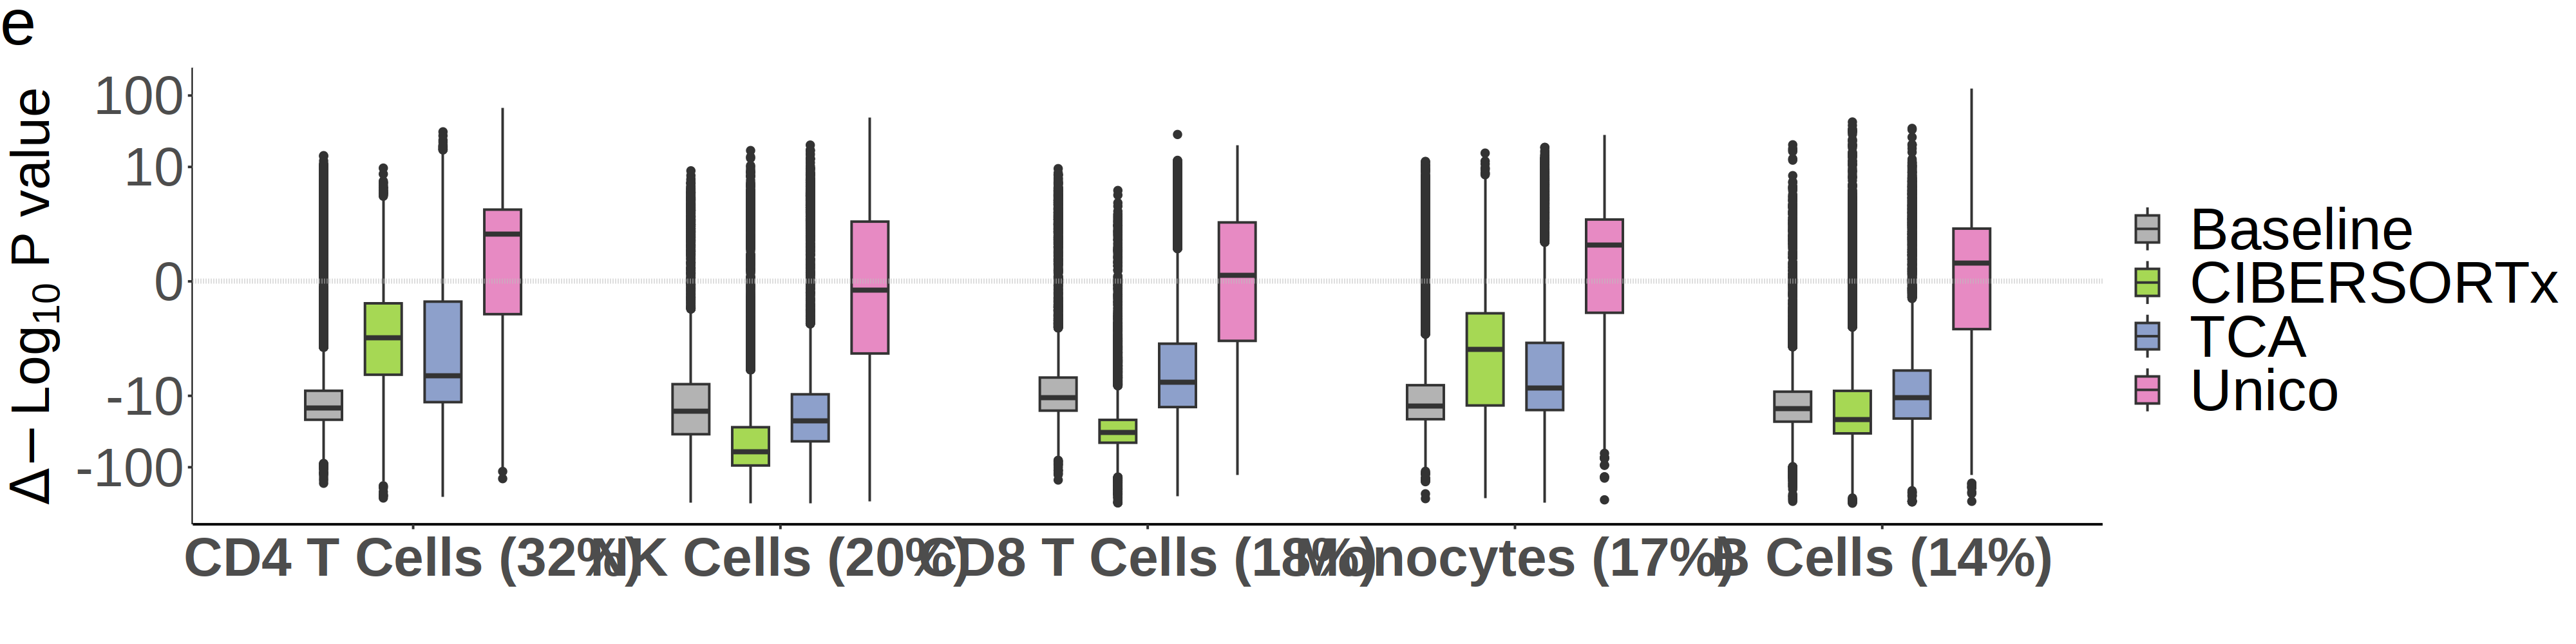

In [9]:
figure.width  = (k) * 4
figure.height = 5
options(repr.plot.width = figure.width, repr.plot.height = figure.height, repr.plot.res = 200)

add.box.p  = egg::ggarrange(plots = list(PBMC.fig.list$add.box.g),
                            labels = c("e"), 
                            label.args = list(gp = grid::gpar(font = 20, cex =3)),)

## Reinius Corrs

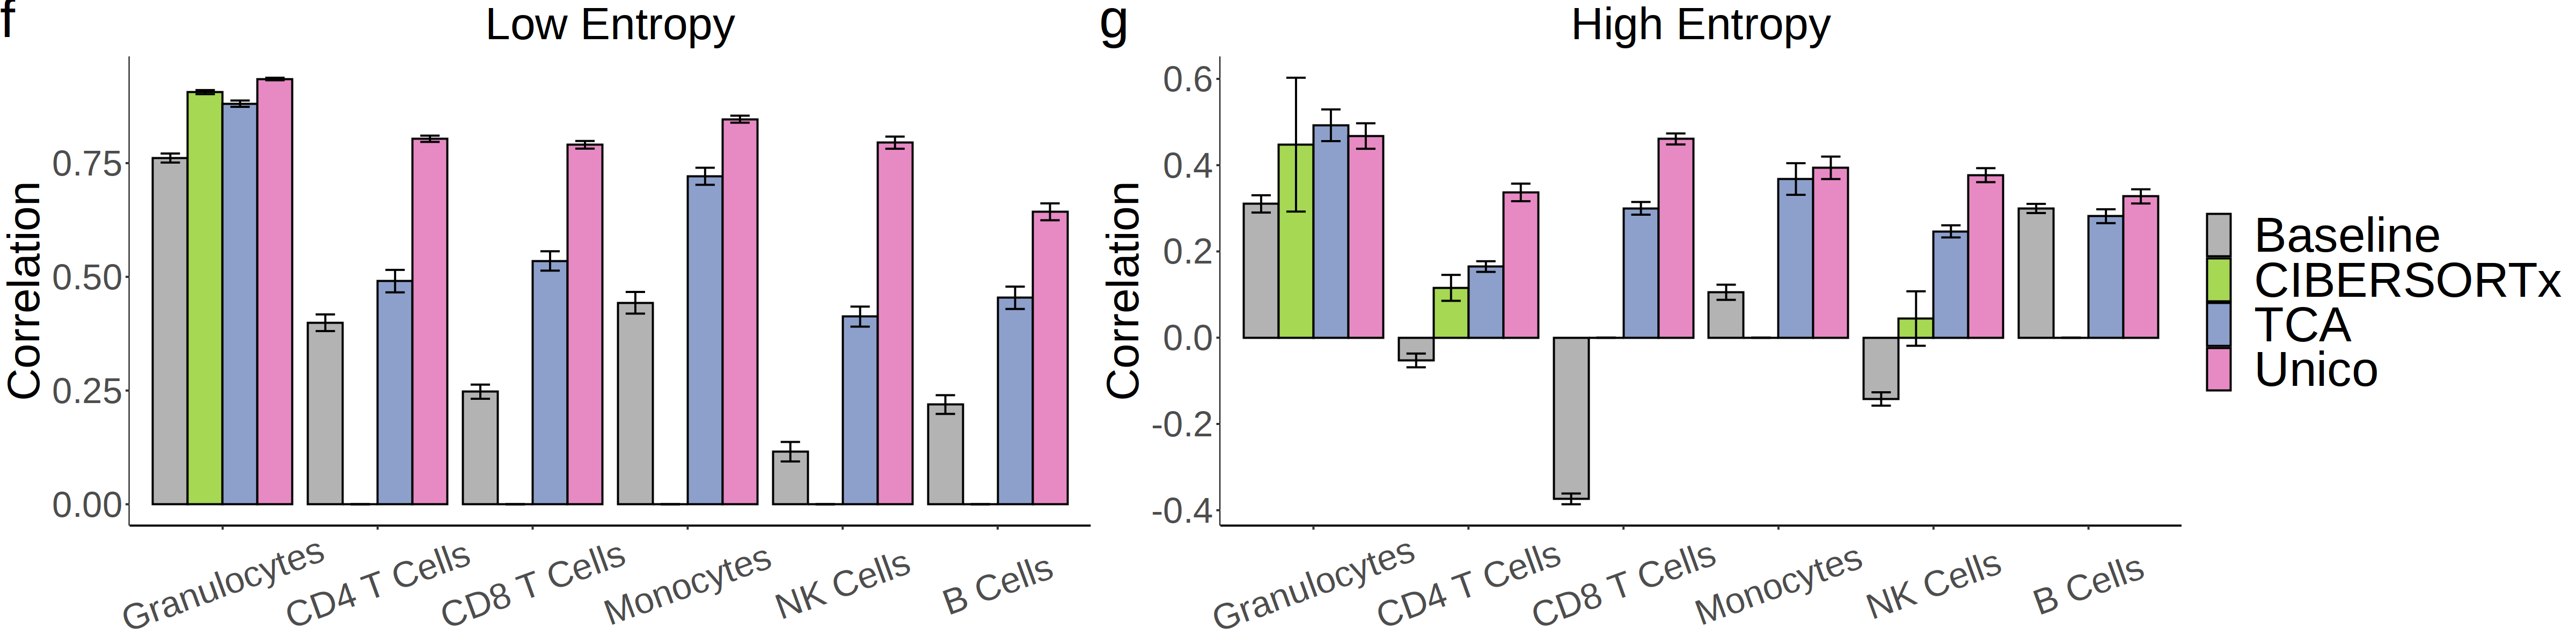

In [10]:
options(repr.plot.width = 24, repr.plot.height = 6, repr.plot.res = 200)
cor.bar.plots = reinius.fig.list$cor.bar.plots
cor.bar.g = egg::ggarrange(plots = list(cor.bar.plots[["low entropy"]] + theme(legend.position = "none"),
                                        cor.bar.plots[["high entropy"]]
                                       ),
                           labels = c("f", "g"), 
                           label.args = list(gp = grid::gpar(font = 20, cex =3)),
                           align = "h",
                           widths = c(1,1),  
                           
                           debug=F)


In [11]:
main.tensor.g = ggarrange(params.bar.g, NULL,
                          cor.box.g,
                          add.box.p,NULL, 
                          cor.bar.g,
                          nrow = 6, 
                          heights = c(1,0.025, 3, 1, 0.05, 1),
                          font.label = list(size = 35, color = "black", face = "bold", family = NULL)) 

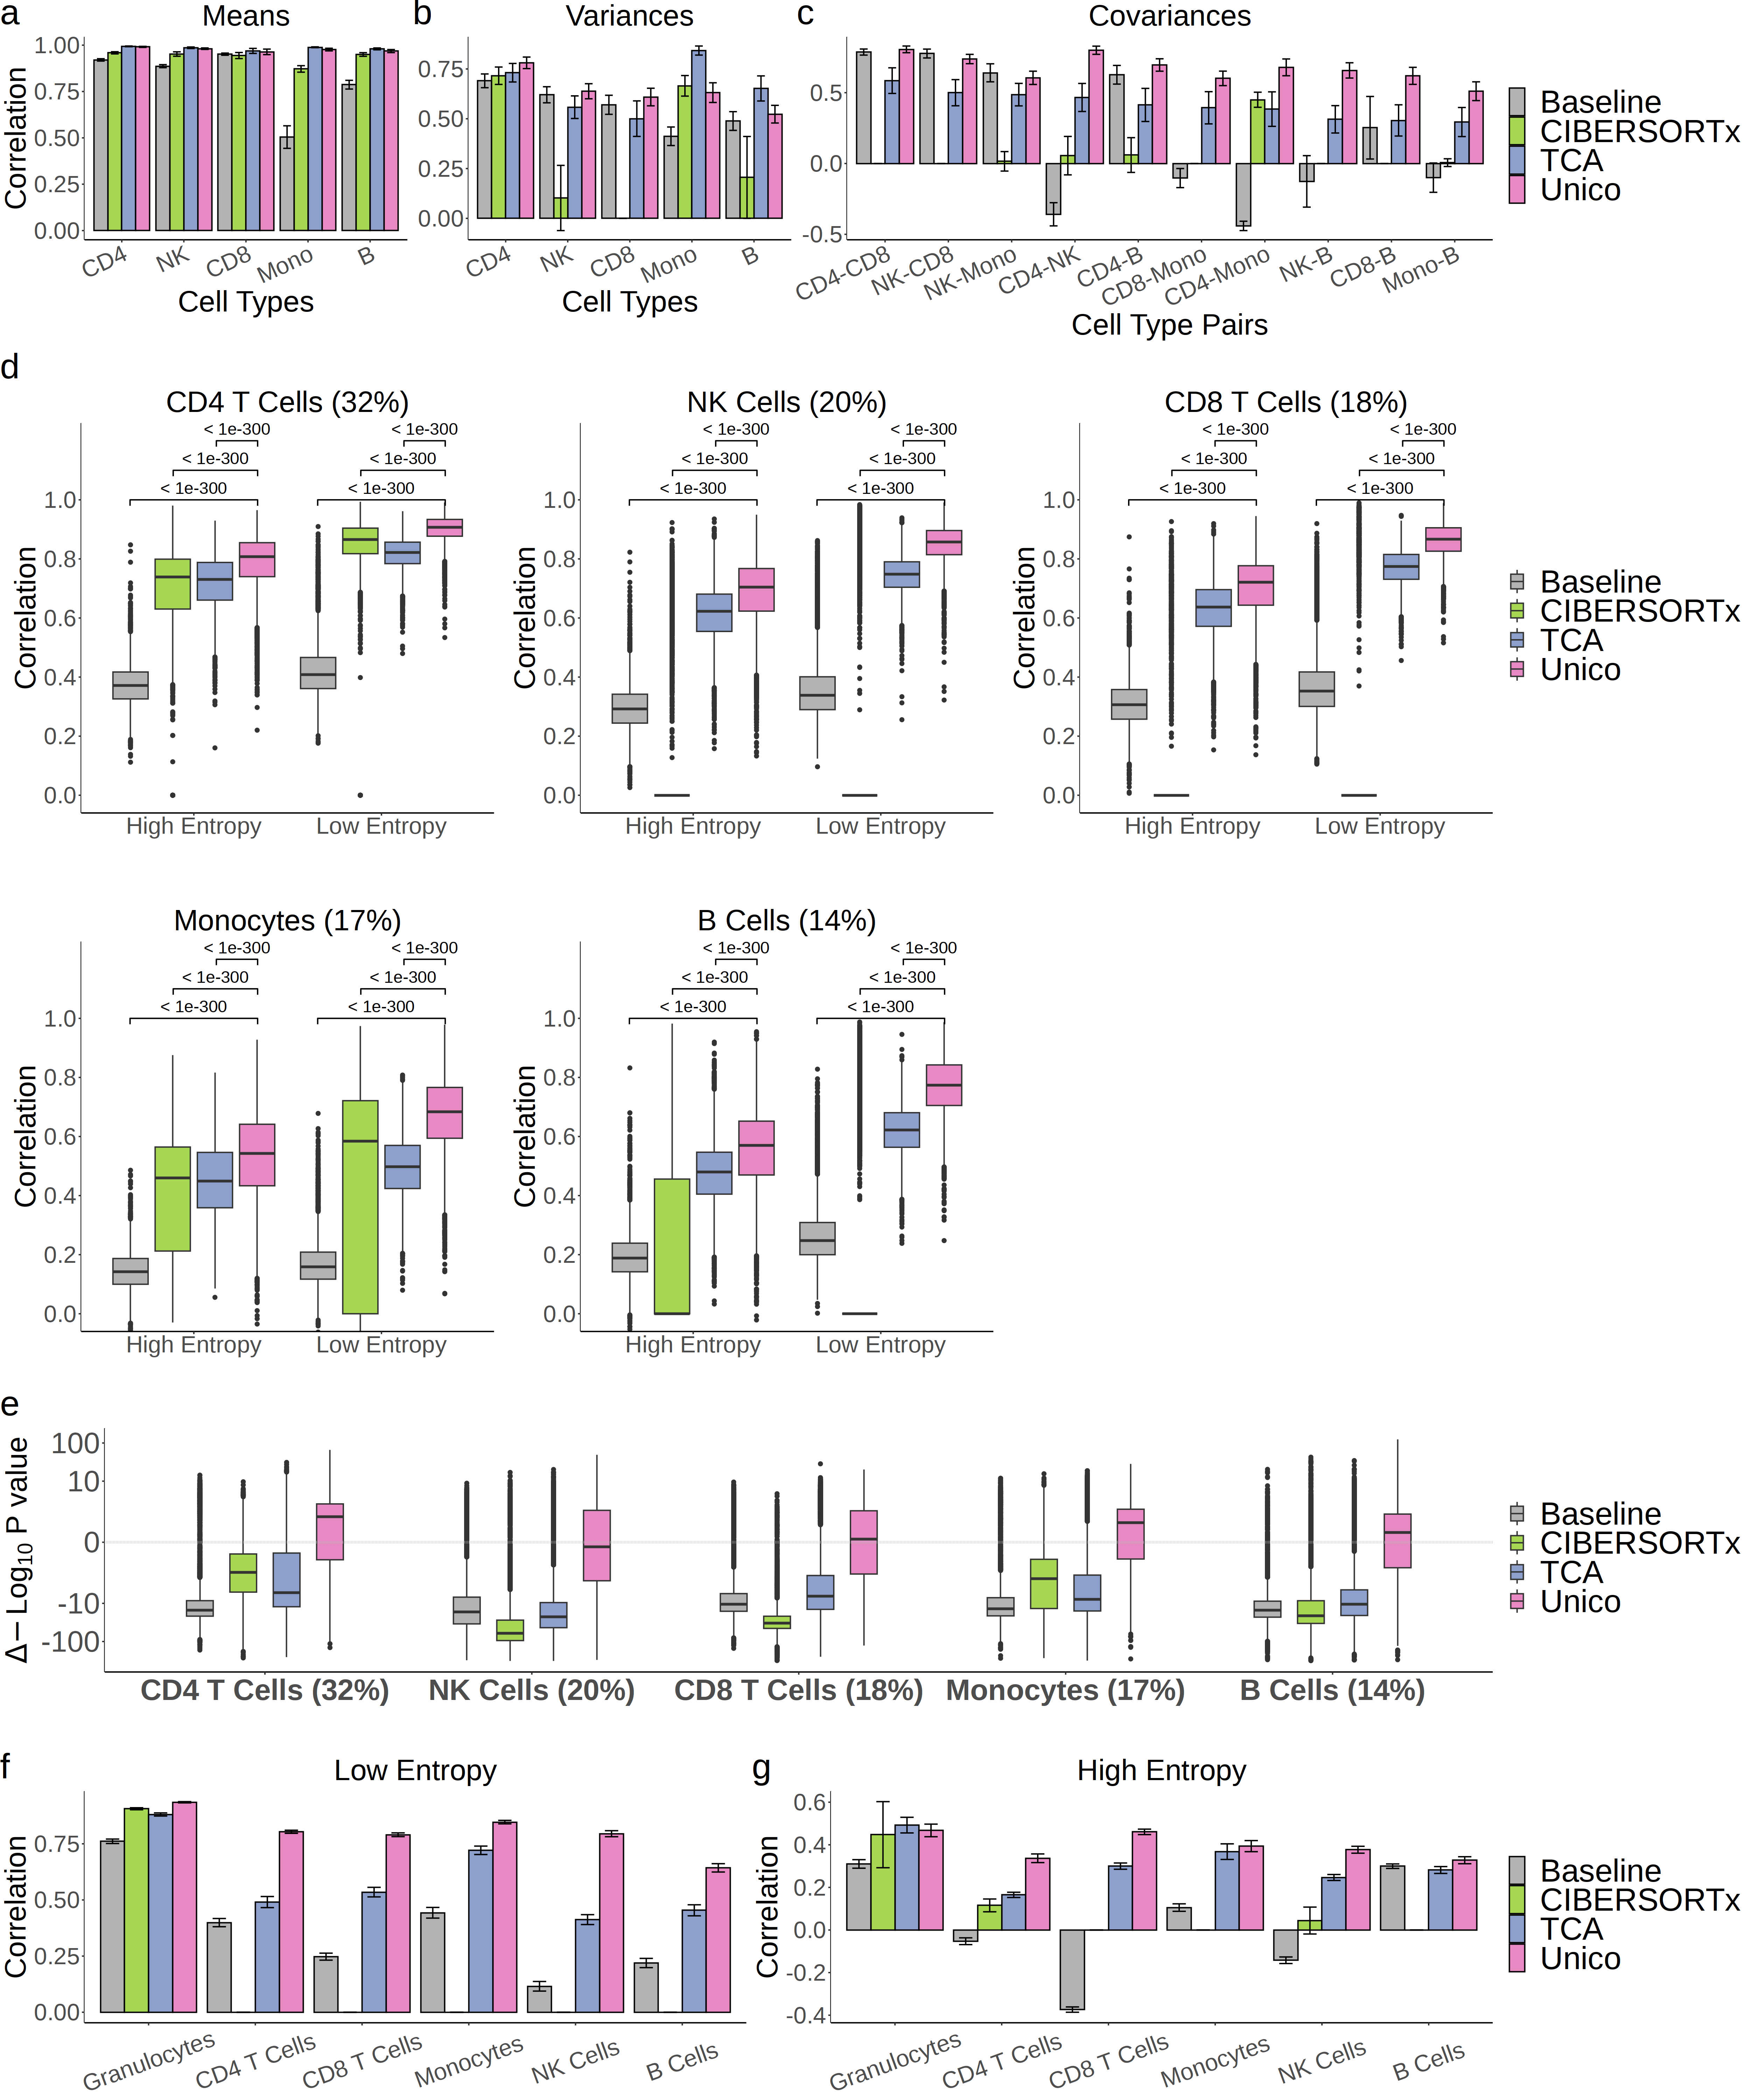

In [12]:
options(repr.plot.width = 25, repr.plot.height = 30, repr.plot.res = 200)
main.tensor.g 

In [13]:
ggsave("../Figure/Main.tensor.result.pdf", main.tensor.g,
       bg = 'white',
       device = "pdf", width = 25, height = 30, dpi = 600)

# Downstream

In [14]:
rna.fig.list  = readRDS("../Figure/CREBBP/CREBBP_fig.list.rds")
meth.fig.list = readRDS("../Figure/EWAS-Consistency/Consistency.fig.list.rds")

Warning message:
“Using the `size` aesthetic in this geom was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` in the `default_aes` field and elsewhere instead.”
Warning message:
“Removed 4 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_text()`).”


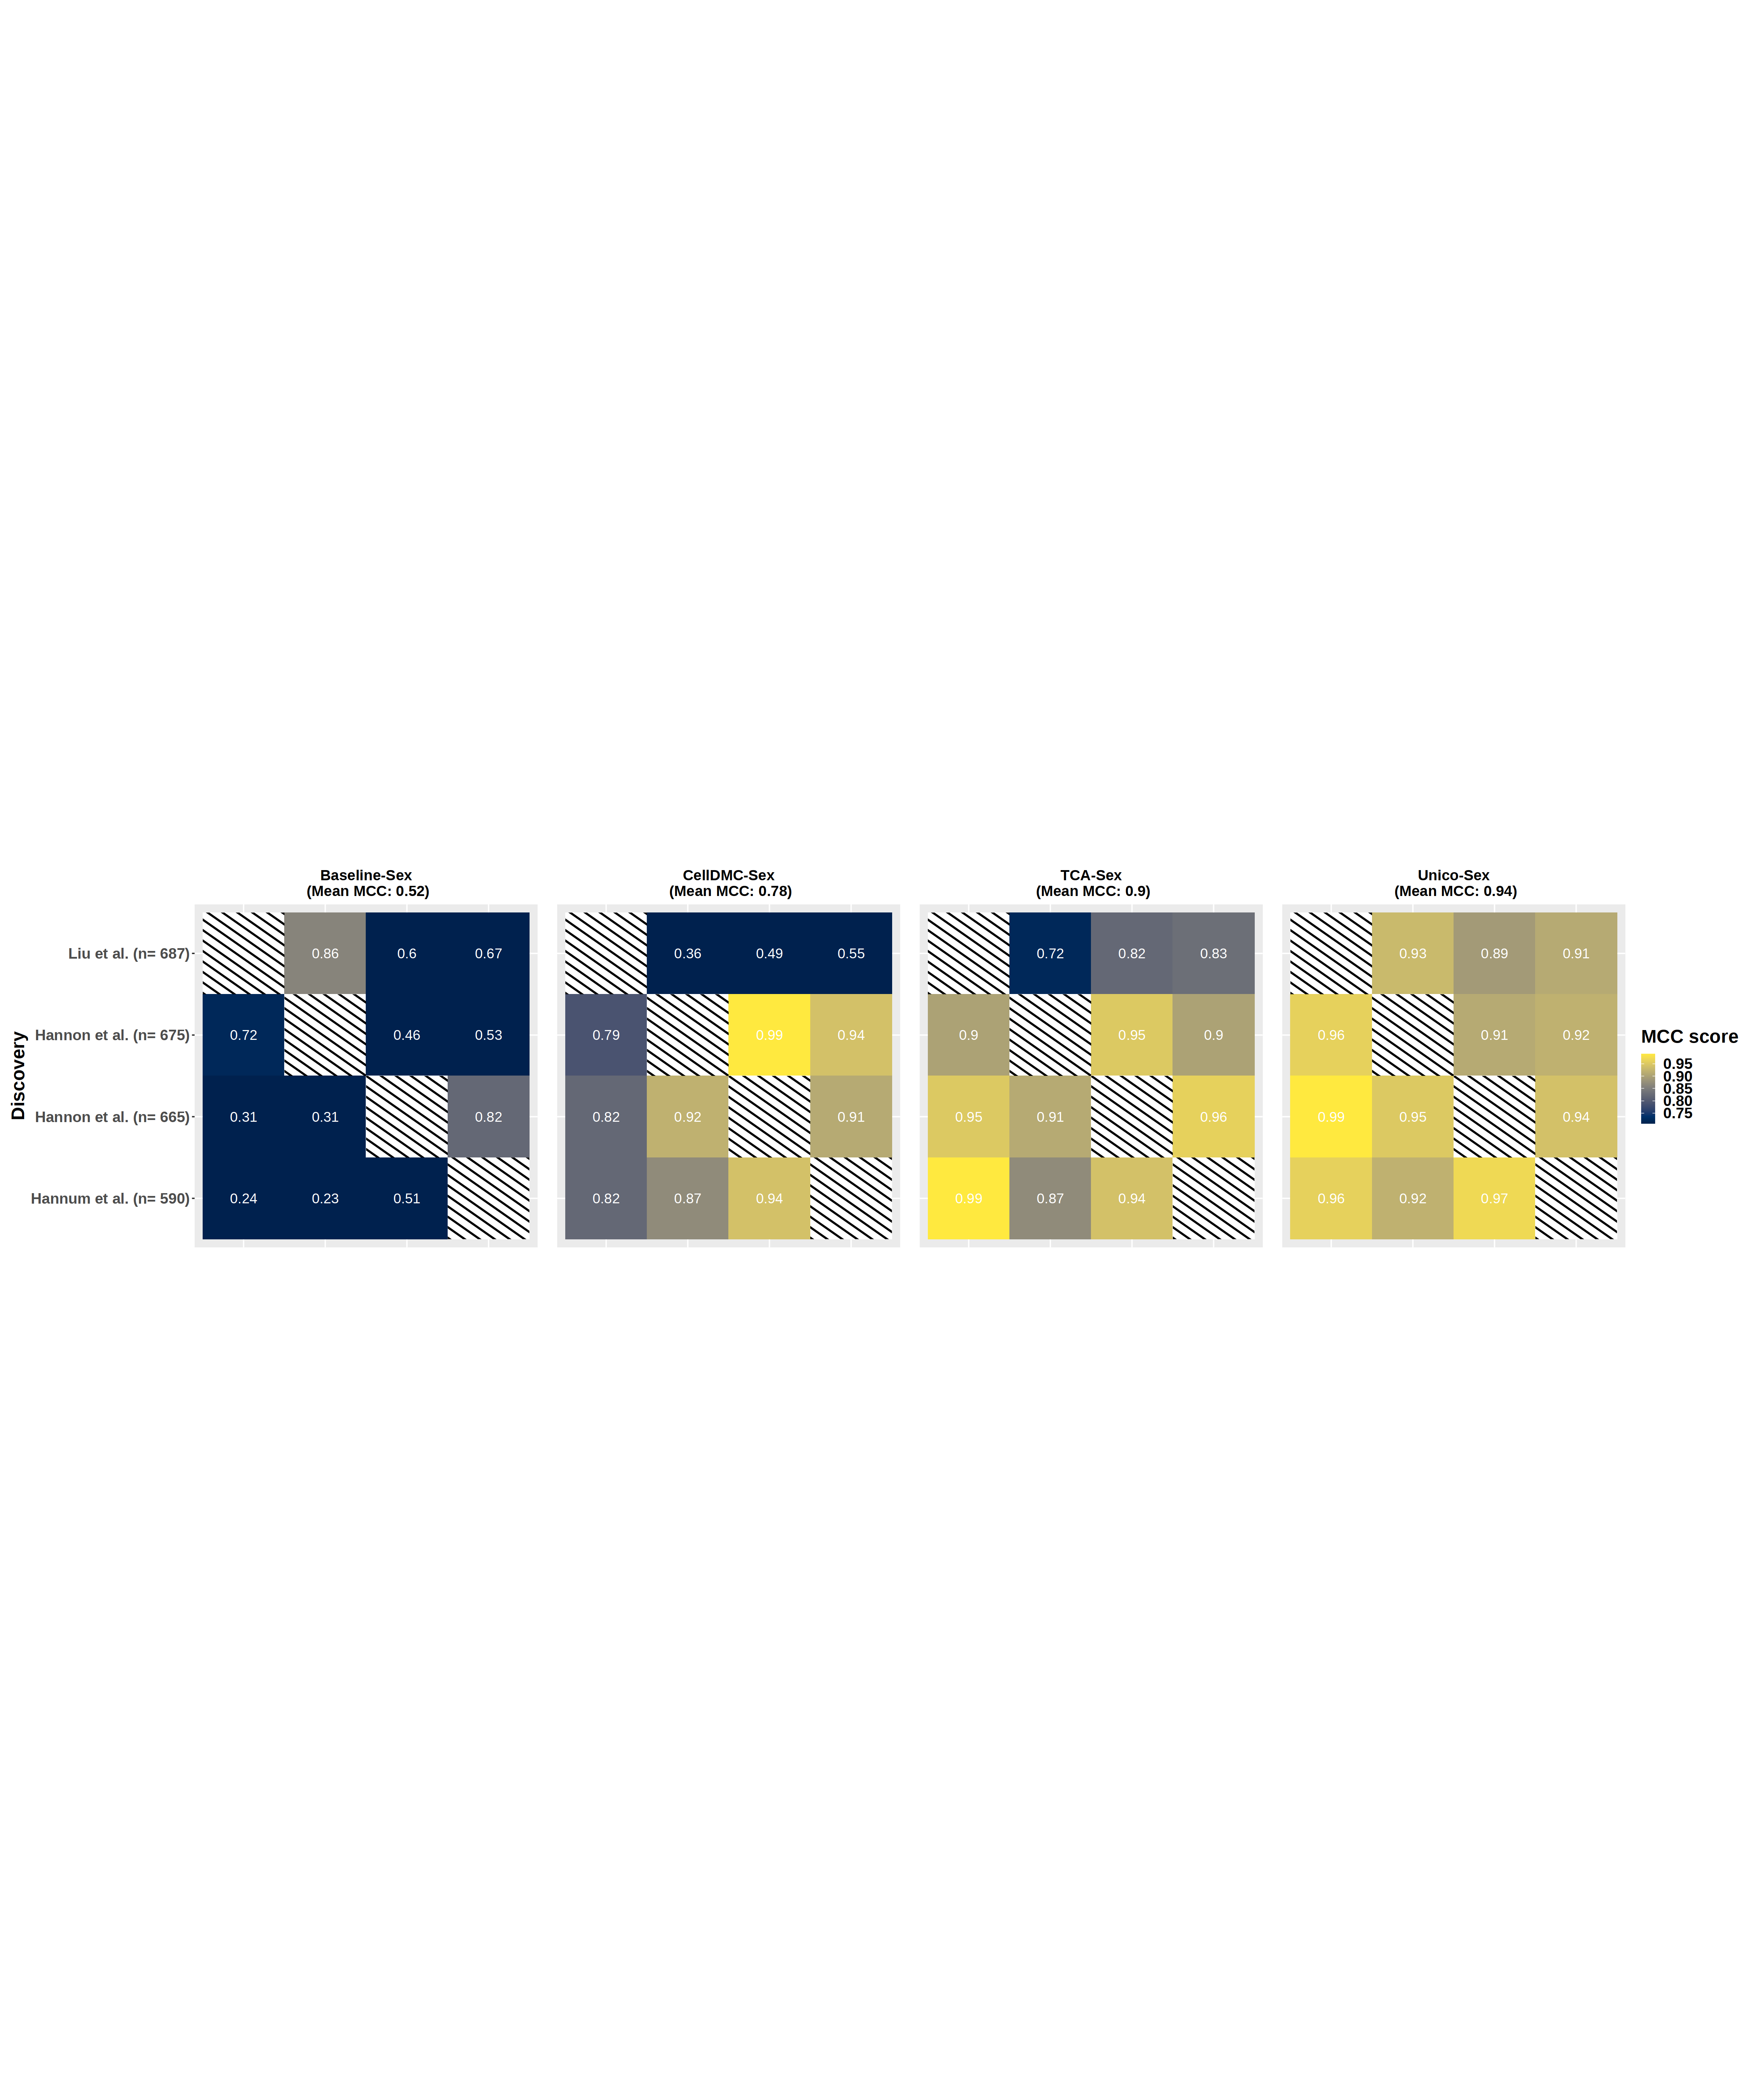

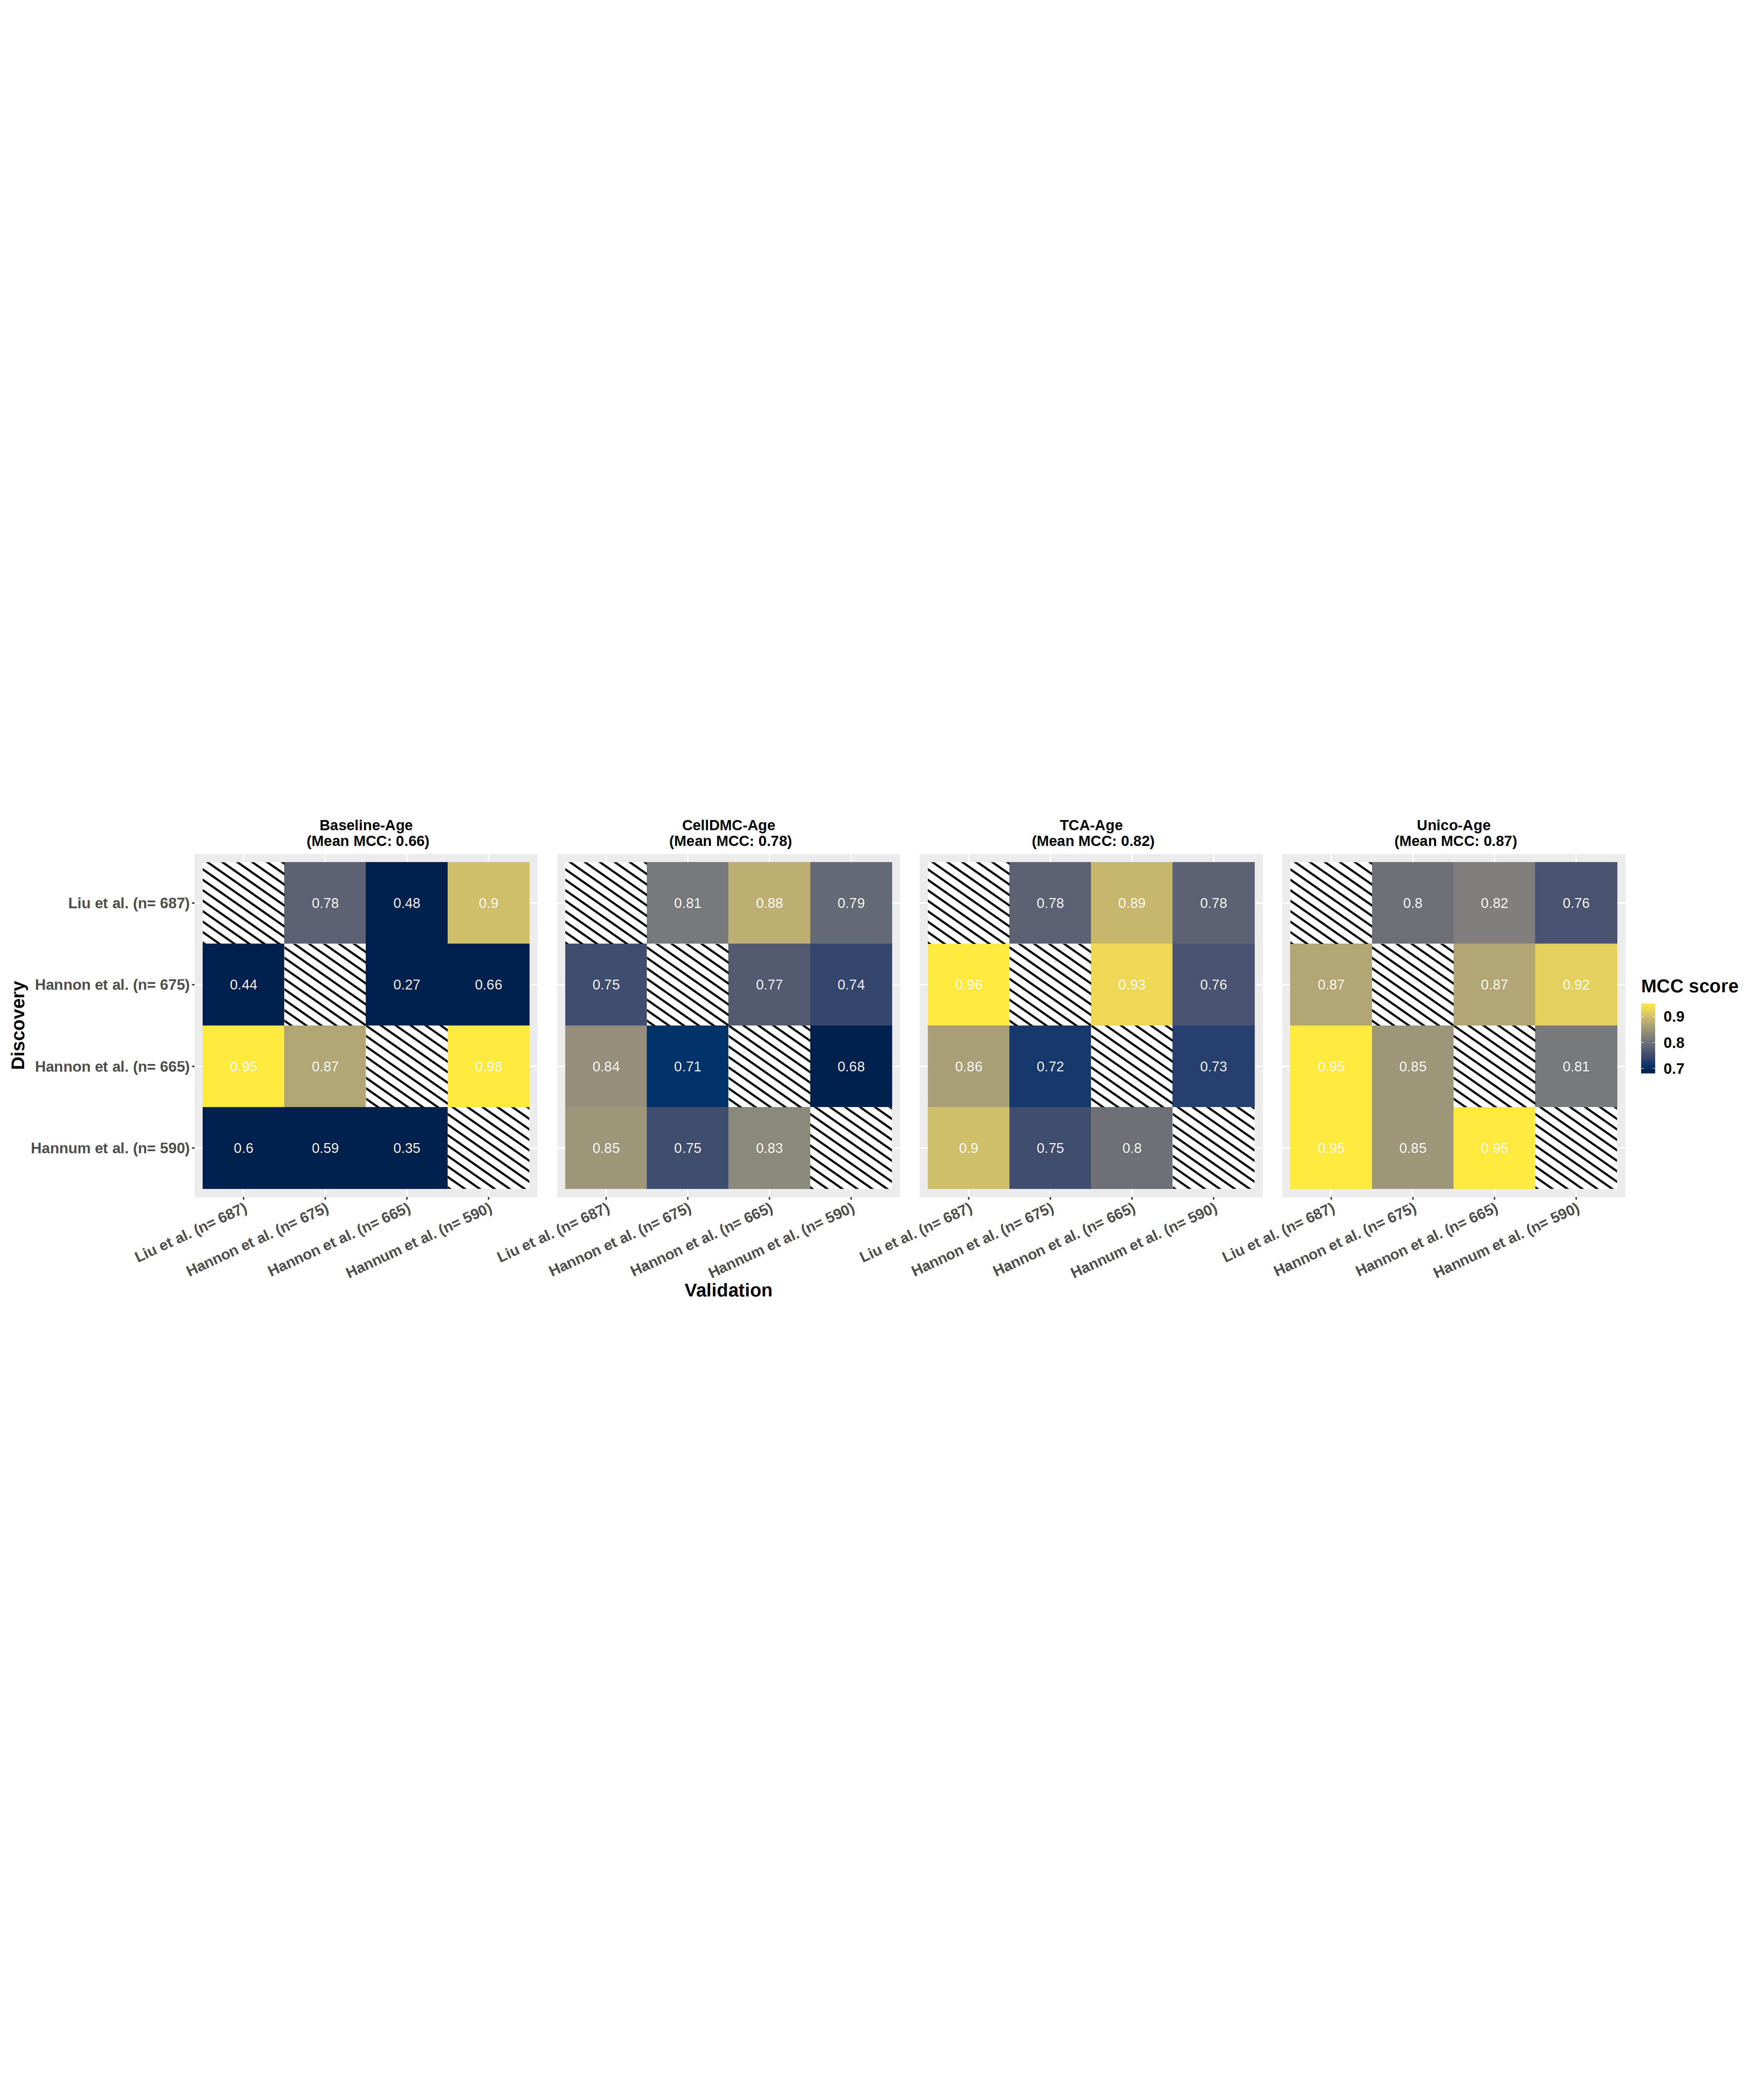

In [15]:
consistency.gender.marg.g = egg::ggarrange(plots=meth.fig.list$consistency.gender.marg.plts,
                                           align = "h",
                                           widths = rep(1, length(meth.fig.list$consistency.gender.marg.plts)),  
                                           debug=F)

title.size = 15
title = "Cell Type Specific EWAS"
consistency.gender.marg.g = annotate_figure(consistency.gender.marg.g,
                                            top = text_grob(title, vjust = +1, # closer to the matrix
                                                            color = "black", face = "bold", size = title.size + 5))

consistency.age.marg.g = egg::ggarrange(plots=meth.fig.list$consistency.age.marg.plts,
                                        align = "h",
                                        widths = rep(1, length(meth.fig.list$consistency.age.marg.plts)),  
                                        debug=F)

In [16]:
main.downstream.g = ggarrange(rna.fig.list$main.g + ggtitle("CREBBP Mutation"),
                              consistency.gender.marg.g,
                              consistency.age.marg.g,
                              nrow = 3, 
                              heights = c(0.9, 0.75,  1),
                              widths =  c(1,  1, 1),
                              labels = c("a", "b"),
                              font.label = list(size = 25, color = "black", face = "bold", family = NULL)) 

Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


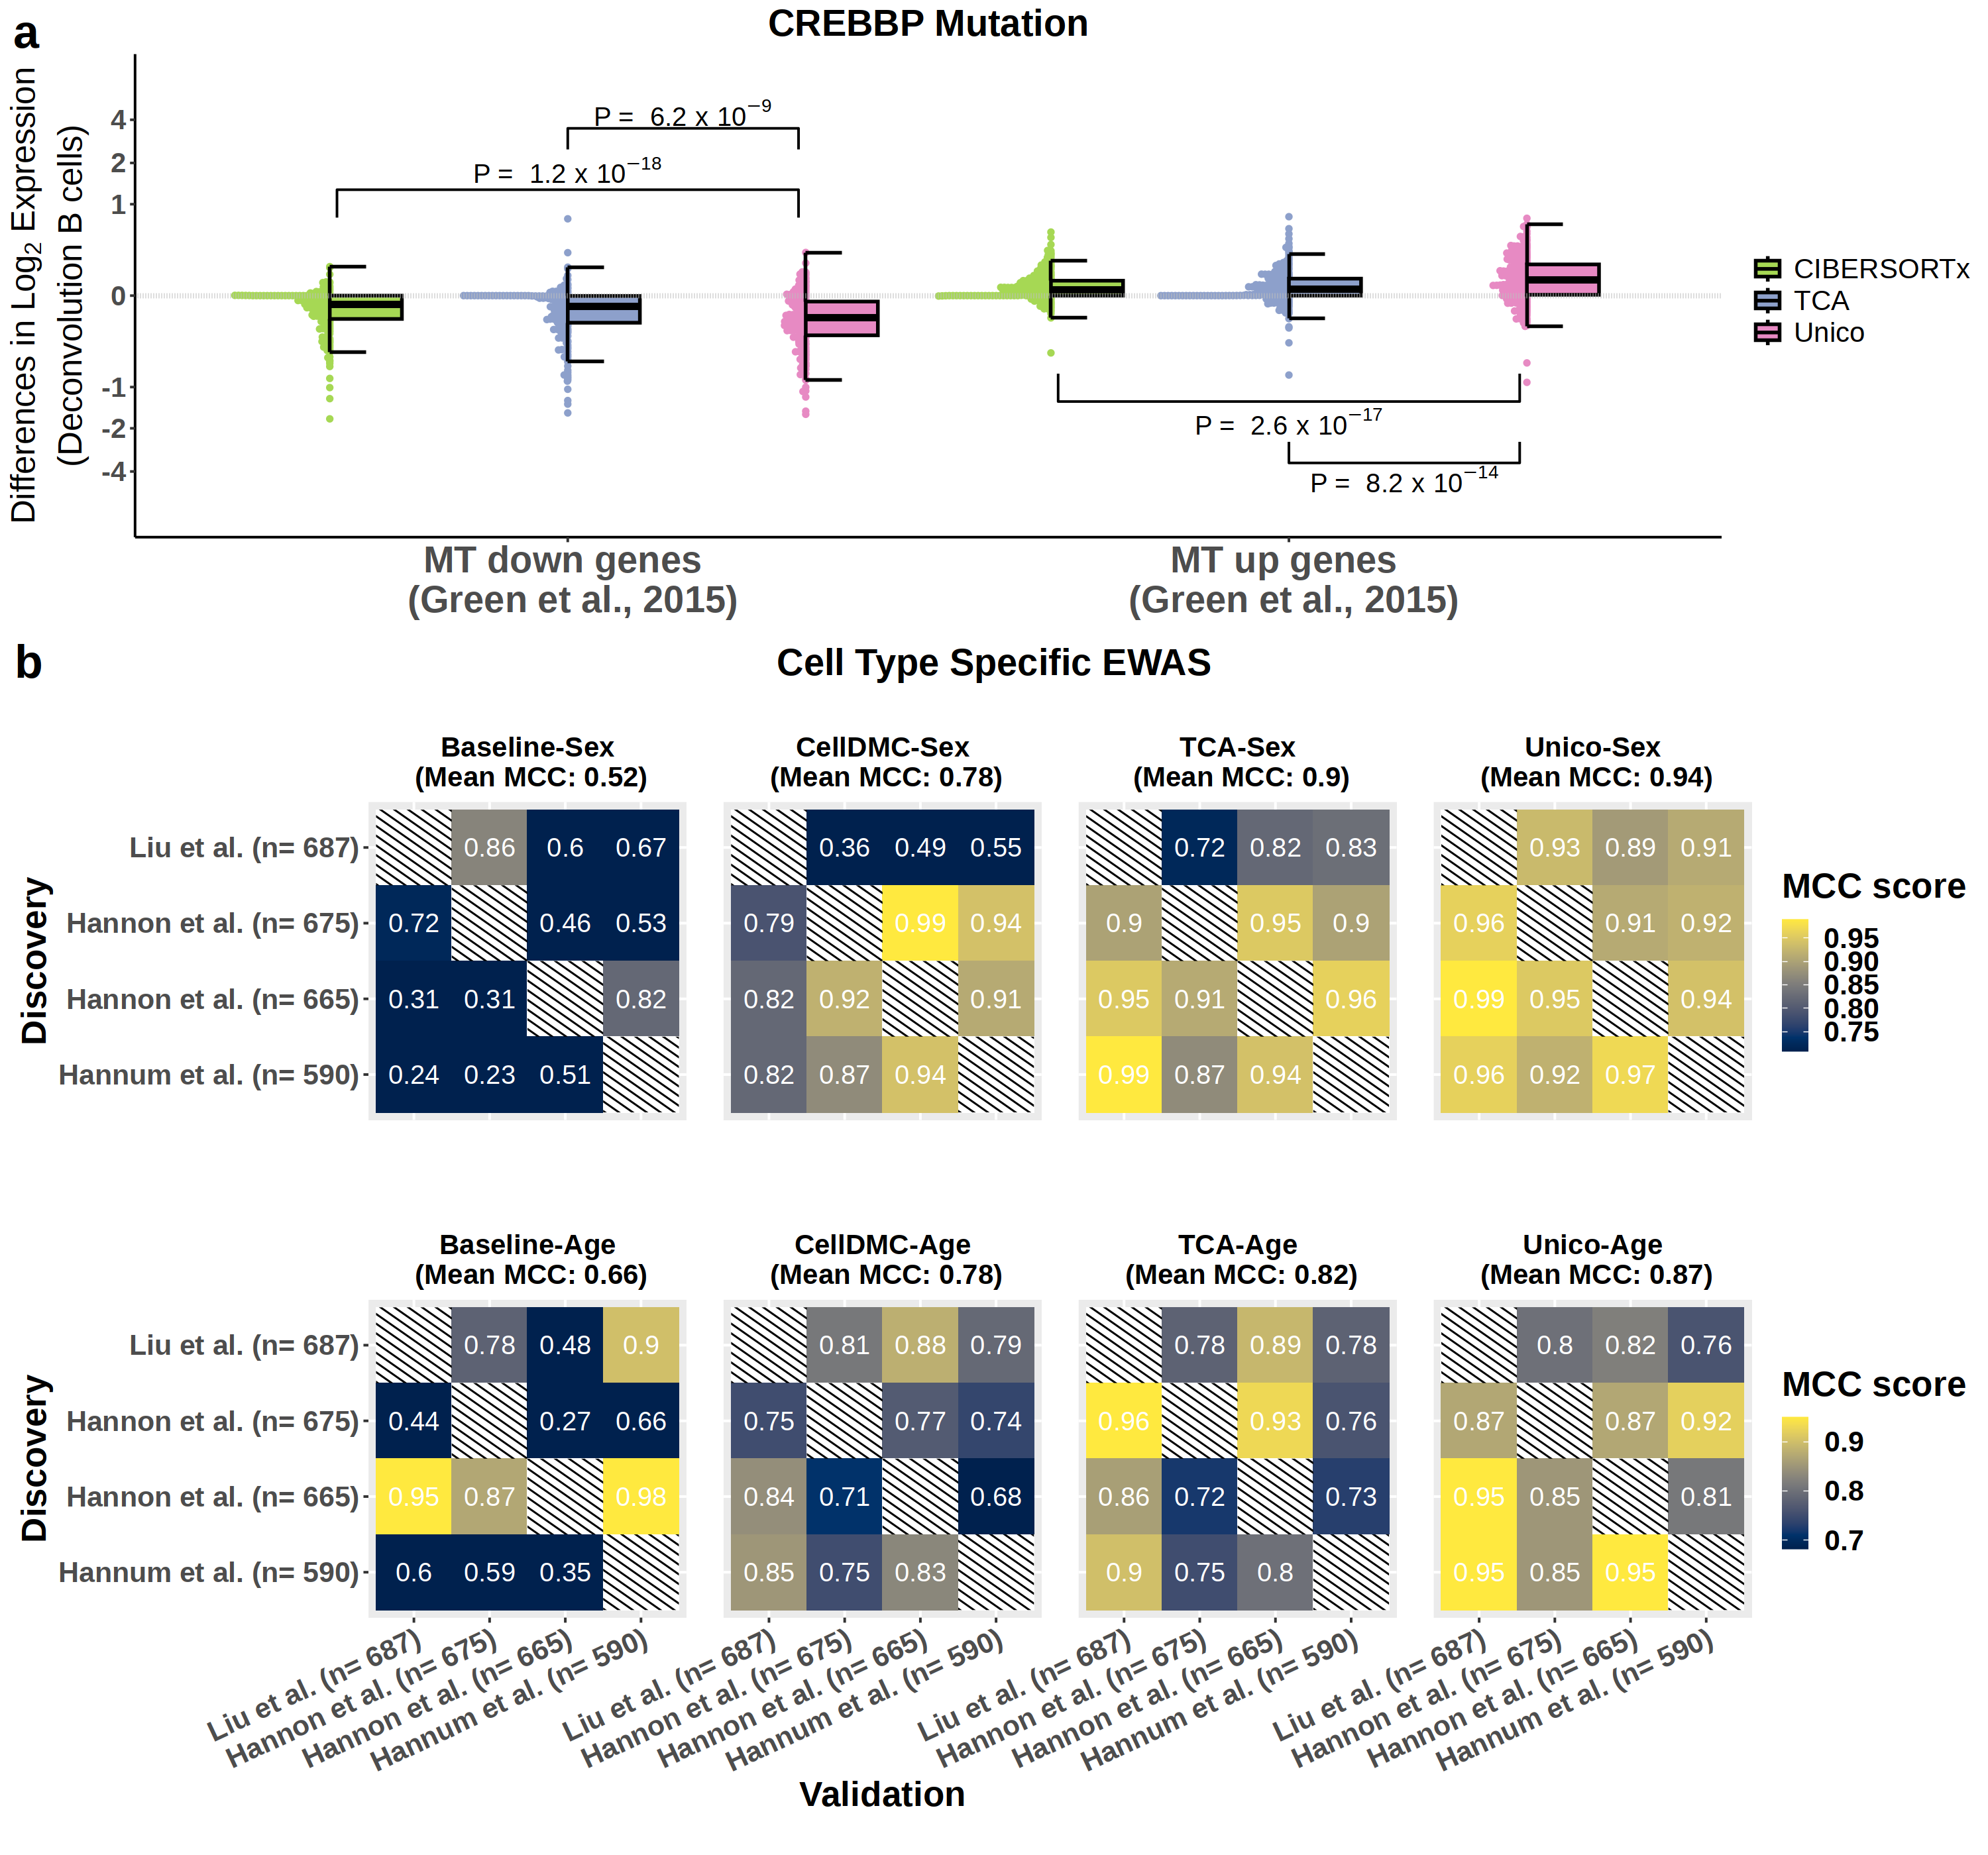

In [17]:
options(repr.plot.width = 15, repr.plot.height = 14, repr.plot.res = 200)
main.downstream.g

In [ ]:
ggsave("../Figure/Main.downstream.result.pdf", main.downstream.g,
       bg = 'white',
       device = "pdf", width = 15, height = 14, dpi = 600)